In [2]:
import math
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from utils import utils 
import algorithms.flexa_battery_optimise as algorithm

To formulate the algorithm, I've treated the battery system as a linear programming problem. The following are the objective function, parameters, decision variables and operational constraint for the linear programming model. The objective function is the objective we would like to maximise, which is the revenue over the time horizon of optimisation. <br>
- The objective function:<br>
$\sum_{t=1}^{T}{P_t}(\frac{D_t{E}}{4}{\eta}-\frac{C_t}{4{\eta}})$ <br>
<br>
- Parameters: <br>
$T$: Time horizon of arbitrage <br>
$P_t$: Spot price at time t <br>
$E$: Charge and discharge efficiency of the battery, I took 0.9. <br>
$\eta$: Marginal Loss Factor, I took 1 in this case for simplicity. <br>
<br>
- Decision Variables: <br>
$Capacity_t$: Opening Capacity at time t <br>
$C_t$: Charge Power at time t <br>
$D_t$: Discharge Power at time t <br>
<br>
- Opertaion Constraint: <br>
$Capacity_t = {Capacity_{t-1}} + \frac{C_t}{4}E - \frac{D_t}{4}$ <br>
$0 \leq {Capacity_t} \leq 1 (or 2), \forall t \in T$ <br>
$0 \leq {C_t} \leq 1, \forall t \in T$ <br>
$0 \leq {D_t} \leq 1, \forall t \in T$ <br>
$D_t \leq \frac{Capacity_t\times{E}}{4}$ <br>
$when\; P_t < 0,\:D_t = 0$ <br>

You could see from the upper formular, I built an optimizer based on 15 mins time interval, which works both for our 15 mins and 60 mins data.

### Question 1.1

read data and transfer the 60 mins data to 15 mins data since my optimizer is for 15 mins time interval

In [2]:
data_60 = utils.transform_df(pd.read_csv('data/Day-ahead_Prices_60min.csv'))
data_15 = utils.split_60_mins_data_into_15_mins(data_60)

In [3]:
result_1 = algorithm.battery_optimisation(data_15.start_timestamp, data_15.spot_price, solver='glpk')

In [4]:
result_1[0:50]

,datetime,spot_price,power,market_dispatch,opening_capacity,revenue
0,2022-01-01 00:00:00,50.05,0.000000,0.000000,0.000,0.000000
1,2022-01-01 00:15:00,50.05,0.000000,0.000000,0.000,0.000000
2,2022-01-01 00:30:00,50.05,0.000000,0.000000,0.000,0.000000
3,2022-01-01 00:45:00,50.05,0.000000,0.000000,0.000,0.000000
4,2022-01-01 01:00:00,41.33,0.000000,0.000000,0.000,0.000000
5,2022-01-01 01:15:00,41.33,0.000000,0.000000,0.000,0.000000
6,2022-01-01 01:30:00,41.33,0.000000,0.000000,0.000,0.000000
7,2022-01-01 01:45:00,41.33,0.000000,0.000000,0.000,0.000000
8,2022-01-01 02:00:00,43.22,0.000000,0.000000,0.000,0.000000
9,2022-01-01 02:15:00,43.22,0.000000,0.000000,0.000,0.000000


In [19]:
# if you want to see the bar chart of the operation of the battery, run this line with plotly
fig = px.bar(result_1, x='datetime', y='market_dispatch')
fig.update_layout(
    title="The following bar chart shows the operation of the battery for charging and discharging for the whole 6 month. \
        <br>Please use your mouse to select some time range to zoom in and hover your mouse on the graph to get more information. \
        <br>That is the benefit of using plotly to visualize data.",
    margin=dict(t=100))
fig.show()

Check the following Heatmap to see when we charge the battery and when we discharge the battery. Red means selling electricity (discharging) and Blue means buying electricity (charging).

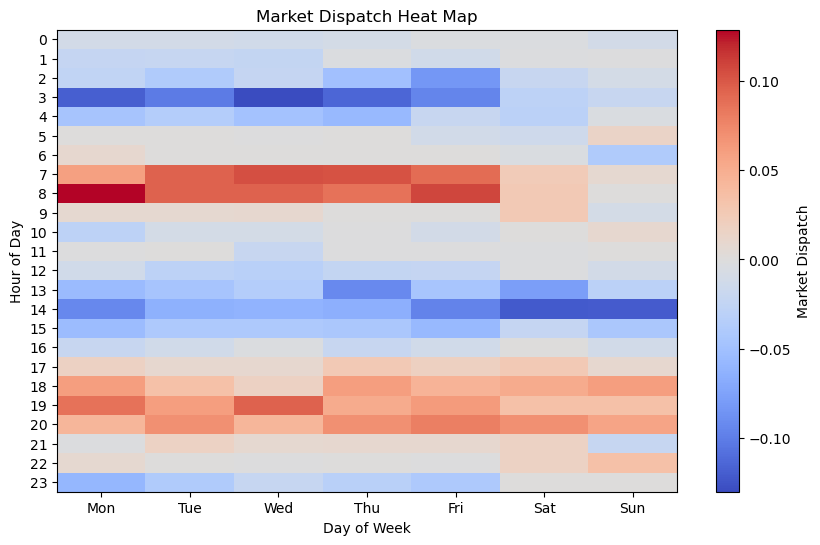

In [6]:
# Create a pivot table to aggregate the market_dispatch values by hour of the day
pivot_table = result_1.pivot_table(index=result_1['datetime'].dt.hour, columns=result_1['datetime'].dt.dayofweek, values='market_dispatch', aggfunc='mean')

# Create the heat map
plt.figure(figsize=(10, 6))
plt.imshow(pivot_table, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Market Dispatch')
plt.title('Market Dispatch Heat Map')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.yticks(range(24))
plt.show()


The previous Heat Map of market dispatch aligned with the Heat Map of the spot price below.

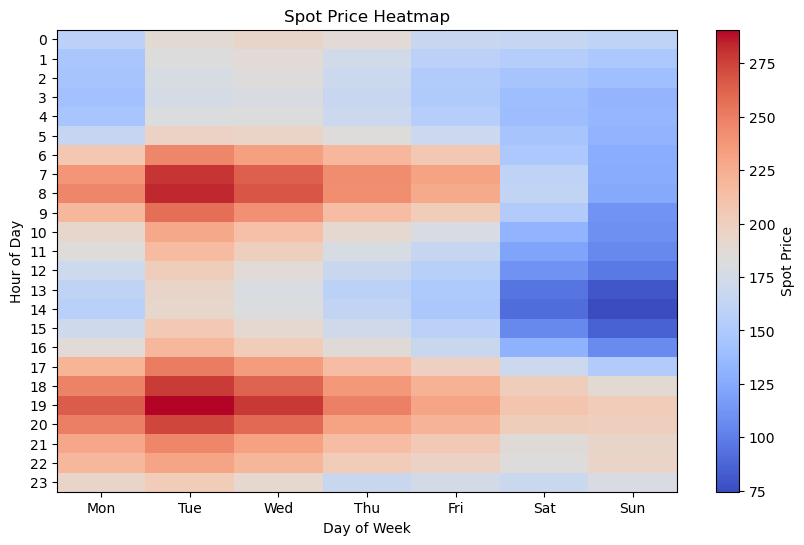

In [7]:
# Create a pivot table to aggregate the spot_price values by hour of the day and day of the week
pivot_table = data_15.pivot_table(index=data_15['start_timestamp'].dt.hour, columns=data_15['start_timestamp'].dt.dayofweek, values='spot_price', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(pivot_table, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Spot Price')
plt.title('Spot Price Heatmap')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.yticks(range(24))
plt.show()


What is the total reveneue from the battery optimisation?

In [18]:
revenue_sum = result_1['revenue'].sum()
print(f"The revenue of the whole 6 month period is {round(revenue_sum, 2)} Euro.")
june_revenue = result_1[result_1['datetime'].dt.month == 6]['revenue'].sum()
print(f"(This is for question 2 later) The revenue of June is {round(june_revenue, 2)} Euro.")

The revenue of the whole 6 month period is 22945.73 Euro.
(This is for question 2 later) The revenue of June is 4365.44 Euro.


### Question 1.2
max_battery_capacity is changed to 2 (MWh)

In [10]:
result_2 = algorithm.battery_optimisation(data_15.start_timestamp, data_15.spot_price, max_battery_capacity=2, solver='glpk')

In [11]:
result_2[0:50]

,datetime,spot_price,power,market_dispatch,opening_capacity,revenue
0,2022-01-01 00:00:00,50.05,0.000000,0.000000,0.000,0.0000
1,2022-01-01 00:15:00,50.05,0.000000,0.000000,0.000,0.0000
2,2022-01-01 00:30:00,50.05,0.000000,0.000000,0.000,0.0000
3,2022-01-01 00:45:00,50.05,0.000000,0.000000,0.000,0.0000
4,2022-01-01 01:00:00,41.33,0.000000,0.000000,0.000,0.0000
5,2022-01-01 01:15:00,41.33,0.000000,0.000000,0.000,0.0000
6,2022-01-01 01:30:00,41.33,0.000000,0.000000,0.000,0.0000
7,2022-01-01 01:45:00,41.33,0.000000,0.000000,0.000,0.0000
8,2022-01-01 02:00:00,43.22,0.000000,0.000000,0.000,0.0000
9,2022-01-01 02:15:00,43.22,0.000000,0.000000,0.000,0.0000


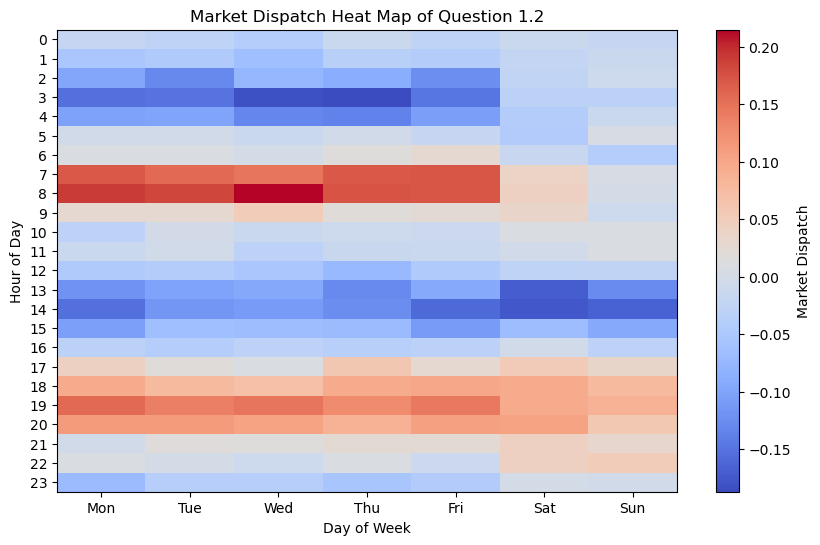

In [13]:
# Create a pivot table to aggregate the market_dispatch values by hour of the day
pivot_table = result_2.pivot_table(index=result_2['datetime'].dt.hour, columns=result_2['datetime'].dt.dayofweek, values='market_dispatch', aggfunc='mean')

# Create the heat map
plt.figure(figsize=(10, 6))
plt.imshow(pivot_table, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Market Dispatch')
plt.title('Market Dispatch Heat Map of Question 1.2')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.yticks(range(24))
plt.show()

In [14]:
revenue_sum = result_2['revenue'].sum()
print(f"The revenue of the whole 6 month period in this case is {round(revenue_sum, 2)} Euro.")

The revenue of the whole 6 month period in this case is 41703.94 Euro.
